<a href="https://colab.research.google.com/github/sumin2002/-/blob/main/LSTM%20GRU%20%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

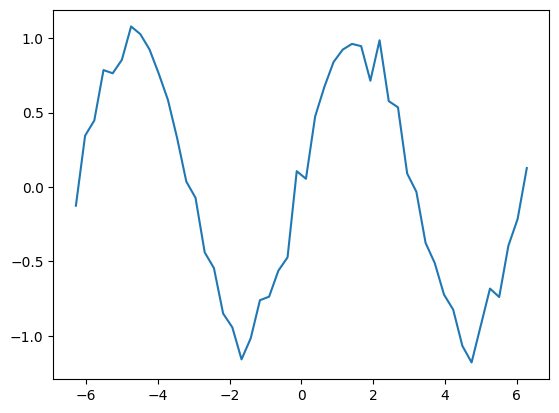

In [2]:
import numpy as np #데이터 작성 
import matplotlib.pyplot as plt
x_data = np.linspace(-2*np.pi, 2*np.pi) #-2T에서 27까지
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))
# sin() 함수에 난수로 노이즈를 더한다
plt.plot(x_data, sin_data) 
plt.show()
n_rnn = 10 # 시계열의 수 
n_sample = len(x_data)-n_rnn # 샘플 수
x = np.zeros((n_sample, n_rnn))  # 입력

In [3]:
t= np.zeros((n_sample,n_rnn)) # 정답
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1] # 시계열을 입력보다도 1개 뒤로 비켜놓는다
x=x.reshape(n_sample, n_rnn, 1) # 샘플 수, 시계열의 수입력층의 뉴런 수
print(x.shape)
t=t.reshape(n_sample, n_rnn, 1) # 이번은 입력과 같은 형태
print(t.shape)

(40, 10, 1)
(40, 10, 1)


In [4]:
from tensorflow. python.keras.models import Sequential
from tensorflow.python. keras. layers import Dense, LSTM, GRU
n_in=1 #입력층의 뉴런 수
n_mid =20 # 중간층의 뉴런 수
n_out =1 # 출력층의 뉴런 수

# 비교를 위한 LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid,input_shape=(n_rnn, n_in),return_sequences=True))
model_lstm.add(Dense(n_out, activation="linear"))
model_lstm.compile(loss="mean_squared_error", optimizer="sgd")
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 20)            1760      
_________________________________________________________________
dense (Dense)                (None, 10, 1)             21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
#GRU
model_gru=Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, n_in),return_sequences=True))

In [6]:
model_gru.add(Dense(n_out, activation="linear"))
model_gru.compile(loss= "mean_squared_error", optimizer="sgd")
print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 20)            1320      
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
import time
epochs=500
batch_size=8 # 배치 크기
#LSTM
start_time=time.time()
history_lstm=model_lstm.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("학습 시간 --LSTM--:", time.time() - start_time)

#GRU
start_time = time.time()
history_gru = model_gru.fit(x, t, epochs=epochs,batch_size=batch_size,verbose=0)
print("학습 시간 --GRU--:", time.time() - start_time)

학습 시간 --LSTM--: 38.620898485183716
학습 시간 --GRU--: 31.47100305557251


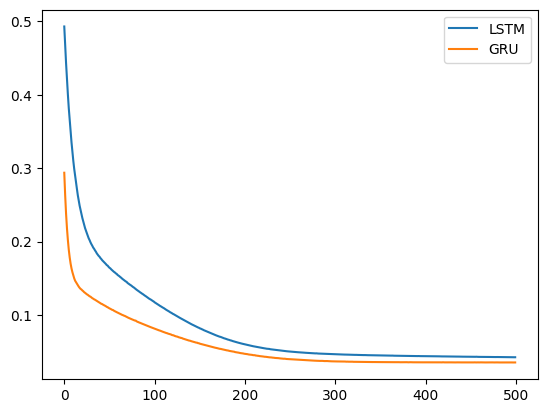

In [14]:
loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']
plt.plot(np.arange (len(loss_lstm)), loss_lstm, label="LSTM")
plt.plot(np.arange(len(loss_gru)), loss_gru, label="GRU")
plt.legend()
plt.show()

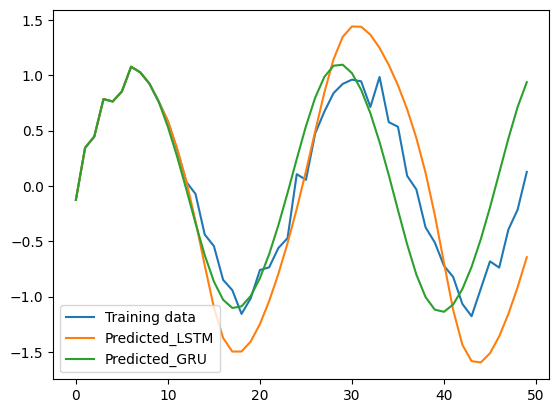

In [15]:
predicted_lstm = x[0].reshape(-1)
predicted_gru = x[0].reshape(-1)
for i in range(0, n_sample):
  y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_lstm = np.append(predicted_lstm, y_lstm[0][n_rnn-1][0])
  y_gru = model_gru.predict(predicted_gru[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_gru = np.append(predicted_gru, y_gru[0][n_rnn-1][0])

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted_lstm)), predicted_lstm,label="Predicted_LSTM")
plt.plot(np.arange(len(predicted_gru)), predicted_gru,label="Predicted_GRU")
plt.legend()
plt.show()